## Produce digits of power

In [45]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

import random
import pickle

import sklearn.datasets
import sklearn.model_selection

import sklearn.neural_network

In [46]:
from keras.datasets import mnist
from keras.layers import Dense, Flatten
(X, y), (x_test, y_test) = mnist.load_data()

Preprocessing

In [47]:
Ns = [1,2,3,4,5,6,7,8,9,10]

In [48]:
X=X/255
XT=x_test/255
yT=y_test

In [49]:
X=X.reshape(60000, 28**2)
XT=XT.reshape(10000, 28**2)

In [50]:
# Call MNIST and keep 3s and 7s
#mnist = sklearn.datasets.fetch_mldata("MNIST original")

# Rescale the data and extract all images for two digits
#X, y = mnist.data / 255., mnist.target

index = np.where((y == 3) | (y == 7))[0]
X0,y = X[index], y[index]

Index = np.where((yT == 3) | (yT == 7))[0]
XT,yT = XT[Index], yT[Index]

X0_train1, X0_train2, y_train1, y_train2 = sklearn.model_selection.train_test_split(X0, y, test_size=0.5)

Training

In [51]:
small_neural = sklearn.neural_network.MLPClassifier(activation = "relu", hidden_layer_sizes=(4,), max_iter = 500, solver='sgd', random_state=5, learning_rate = 'adaptive',verbose = 1)
small_neural.fit(X0_train1,y_train1)


Iteration 1, loss = 0.68372665
Iteration 2, loss = 0.53419650
Iteration 3, loss = 0.44971671
Iteration 4, loss = 0.40623695
Iteration 5, loss = 0.37799362
Iteration 6, loss = 0.35693018
Iteration 7, loss = 0.33972562
Iteration 8, loss = 0.32518219
Iteration 9, loss = 0.31230877
Iteration 10, loss = 0.30076979
Iteration 11, loss = 0.29031722
Iteration 12, loss = 0.28071396
Iteration 13, loss = 0.27189981
Iteration 14, loss = 0.26366565
Iteration 15, loss = 0.25606468
Iteration 16, loss = 0.24888550
Iteration 17, loss = 0.24222967
Iteration 18, loss = 0.23593164
Iteration 19, loss = 0.22999987
Iteration 20, loss = 0.22438619
Iteration 21, loss = 0.21905027
Iteration 22, loss = 0.21401745
Iteration 23, loss = 0.20923914
Iteration 24, loss = 0.20469823
Iteration 25, loss = 0.20035284
Iteration 26, loss = 0.19624764
Iteration 27, loss = 0.19230108
Iteration 28, loss = 0.18853942
Iteration 29, loss = 0.18494136
Iteration 30, loss = 0.18151461
Iteration 31, loss = 0.17821128
Iteration 32, los

Iteration 254, loss = 0.04942268
Iteration 255, loss = 0.04929619
Iteration 256, loss = 0.04916690
Iteration 257, loss = 0.04903840
Iteration 258, loss = 0.04891781
Iteration 259, loss = 0.04879069
Iteration 260, loss = 0.04867284
Iteration 261, loss = 0.04858847
Iteration 262, loss = 0.04841987
Iteration 263, loss = 0.04830306
Iteration 264, loss = 0.04817299
Iteration 265, loss = 0.04805704
Iteration 266, loss = 0.04795346
Iteration 267, loss = 0.04779520
Iteration 268, loss = 0.04773450
Iteration 269, loss = 0.04759187
Iteration 270, loss = 0.04744168
Iteration 271, loss = 0.04734428
Iteration 272, loss = 0.04722771
Iteration 273, loss = 0.04709962
Iteration 274, loss = 0.04700799
Iteration 275, loss = 0.04689512
Iteration 276, loss = 0.04675601
Iteration 277, loss = 0.04669735
Iteration 278, loss = 0.04651842
Iteration 279, loss = 0.04642021
Iteration 280, loss = 0.04631836
Iteration 281, loss = 0.04619587
Iteration 282, loss = 0.04609253
Iteration 283, loss = 0.04600752
Iteration 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=1,
       warm_start=False)

In [52]:
def hill(x,n,theta):
#     return x**n
    return x**n/(x**n + theta**n)

Stacked Model

In [53]:
theta = 0.5
middle_SM = np.zeros((len(Ns),len(X0_train2)))
for idx_N,N in enumerate(Ns):
    X = hill(X0_train2,N,theta)
    middle_SM[idx_N]=small_neural.predict(X)

In [54]:
middle_SM=np.transpose(middle_SM)
middle_SM.shape

(6198, 10)

In [55]:
master_neural = sklearn.neural_network.MLPClassifier(activation = "logistic", hidden_layer_sizes=(5,), max_iter = 500, solver='sgd', random_state=5, learning_rate = 'adaptive',verbose = 1)
master_neural.fit(middle_SM,y_train2)

Iteration 1, loss = 0.76236697
Iteration 2, loss = 0.73688053
Iteration 3, loss = 0.71781512
Iteration 4, loss = 0.70376095
Iteration 5, loss = 0.69351605
Iteration 6, loss = 0.68611558
Iteration 7, loss = 0.68075701
Iteration 8, loss = 0.67666502
Iteration 9, loss = 0.67349981
Iteration 10, loss = 0.67084354
Iteration 11, loss = 0.66839649
Iteration 12, loss = 0.66603729
Iteration 13, loss = 0.66361950
Iteration 14, loss = 0.66098497
Iteration 15, loss = 0.65797062
Iteration 16, loss = 0.65445167
Iteration 17, loss = 0.65037224
Iteration 18, loss = 0.64608348
Iteration 19, loss = 0.64235723
Iteration 20, loss = 0.63954250
Iteration 21, loss = 0.63721605
Iteration 22, loss = 0.63503237
Iteration 23, loss = 0.63282094
Iteration 24, loss = 0.63055189
Iteration 25, loss = 0.62828217
Iteration 26, loss = 0.62595169
Iteration 27, loss = 0.62358118
Iteration 28, loss = 0.62117105
Iteration 29, loss = 0.61870695
Iteration 30, loss = 0.61624784
Iteration 31, loss = 0.61375941
Iteration 32, los

Iteration 265, loss = 0.12872797
Iteration 266, loss = 0.12817763
Iteration 267, loss = 0.12765660
Iteration 268, loss = 0.12711941
Iteration 269, loss = 0.12656323
Iteration 270, loss = 0.12610142
Iteration 271, loss = 0.12559985
Iteration 272, loss = 0.12503339
Iteration 273, loss = 0.12457817
Iteration 274, loss = 0.12408123
Iteration 275, loss = 0.12358680
Iteration 276, loss = 0.12311494
Iteration 277, loss = 0.12262968
Iteration 278, loss = 0.12222839
Iteration 279, loss = 0.12170591
Iteration 280, loss = 0.12126002
Iteration 281, loss = 0.12079790
Iteration 282, loss = 0.12046157
Iteration 283, loss = 0.11996477
Iteration 284, loss = 0.11952179
Iteration 285, loss = 0.11910143
Iteration 286, loss = 0.11866953
Iteration 287, loss = 0.11827150
Iteration 288, loss = 0.11783529
Iteration 289, loss = 0.11742124
Iteration 290, loss = 0.11704072
Iteration 291, loss = 0.11664266
Iteration 292, loss = 0.11626435
Iteration 293, loss = 0.11588820
Iteration 294, loss = 0.11549603
Iteration 

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=1,
       warm_start=False)

Hidden-layer feed in

In [56]:
#Weights and Biases for Hidden Layer
w1 = small_neural.coefs_[0]
b1 = small_neural.intercepts_[0]

In [57]:
theta = 0.5
middle_HFI = np.zeros(shape=(len(X0_train2),len(Ns),4))
for idx_N,N in enumerate(Ns):
    X = hill(X0_train2,N,theta)
    for i in range(len(X0_train2)):
        h1=np.matmul(X0_train2[i],w1) + b1
        h1=np.maximum(0, h1)
        middle_HFI[i][idx_N]=h1
print(middle_HFI.shape)

(6198, 10, 4)


In [58]:
middle_HFI=middle_HFI.reshape(6198,4*len(Ns))

In [59]:
HFI = sklearn.neural_network.MLPClassifier(activation = "logistic", hidden_layer_sizes=(5,), max_iter = 500, solver='sgd', random_state=5, learning_rate = 'adaptive',verbose = 1)
HFI.fit(middle_HFI,y_train2)

Iteration 1, loss = 0.71372312
Iteration 2, loss = 0.67318656
Iteration 3, loss = 0.63844979
Iteration 4, loss = 0.61526176
Iteration 5, loss = 0.59724408
Iteration 6, loss = 0.58170473
Iteration 7, loss = 0.56760580
Iteration 8, loss = 0.55429293
Iteration 9, loss = 0.54156462
Iteration 10, loss = 0.52931306
Iteration 11, loss = 0.51735706
Iteration 12, loss = 0.50567837
Iteration 13, loss = 0.49425487
Iteration 14, loss = 0.48303673
Iteration 15, loss = 0.47205122
Iteration 16, loss = 0.46126911
Iteration 17, loss = 0.45067585
Iteration 18, loss = 0.44032014
Iteration 19, loss = 0.43015233
Iteration 20, loss = 0.42022211
Iteration 21, loss = 0.41051224
Iteration 22, loss = 0.40101083
Iteration 23, loss = 0.39174301
Iteration 24, loss = 0.38268655
Iteration 25, loss = 0.37385611
Iteration 26, loss = 0.36524989
Iteration 27, loss = 0.35685687
Iteration 28, loss = 0.34869386
Iteration 29, loss = 0.34073305
Iteration 30, loss = 0.33299763
Iteration 31, loss = 0.32547446
Iteration 32, los

Iteration 256, loss = 0.06390521
Iteration 257, loss = 0.06390506
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 258, loss = 0.06390494
Iteration 259, loss = 0.06390490
Iteration 260, loss = 0.06390487
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=1,
       warm_start=False)

master training

Testing

In [60]:
def adv_per3(X,eps,delta):
    return X - eps*np.sign(delta)
def adv_per7(X,eps,delta):
    return X + eps*np.sign(delta)
delta = X0[y == 3].mean(axis=0) - X0[y == 7].mean(axis=0)

In [61]:
XT_perturbed = np.zeros(XT.shape)
theta = 0.5
middle_SM = np.zeros((len(Ns),len(XT)))
middle_HFI = np.zeros(shape=(len(XT),len(Ns),4))
epsilon = np.arange(0,0.5,0.01)
Thomas = np.zeros((len(Ns),len(epsilon)))
score1,score2 = [],[]
for idx_eps,eps in enumerate(epsilon):
    XT_perturbed[yT == 3] = adv_per3(XT[yT == 3],eps,delta)
    XT_perturbed[yT == 7] = adv_per7(XT[yT == 7],eps,delta)
    for idx_N,N in enumerate(Ns):
        X = hill(XT_perturbed,N,theta)
        middle_SM[idx_N]=small_neural.predict(X)
        Thomas[idx_N][idx_eps]=small_neural.score(X,yT)
        #middle_HFI[idx_N]=small_neural.predict(X)
        for i in range(len(X)):
            h1=np.matmul(X[i],w1) + b1
            h1=np.maximum(0, h1)
            middle_HFI[i][idx_N]=h1
    
    middleT1=np.transpose(middle_SM)
    middleT2=middle_HFI.reshape(len(X),4*len(Ns))
    score1.append(master_neural.score(middleT1,yT))
    score2.append(HFI.score(middleT2,yT))

In [62]:
print(middle_SM.shape, middleT2.shape )
print(yT.shape)
print(Ns)
len(X)

(10, 2038) (2038, 40)
(2038,)
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


2038

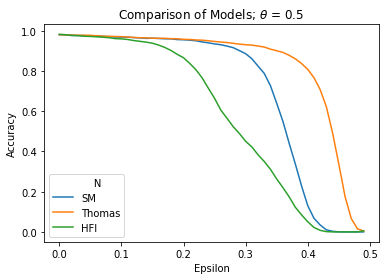

In [63]:
fig,ax = plt.subplots()
ax.plot(epsilon,score1)
ax.plot(epsilon,Thomas[len(Thomas)-1])
ax.plot(epsilon,score2)
ax.set_title(r"Comparison of Models; $\theta$ = %.1f"%theta)
ax.set_xlabel("Epsilon")
ax.set_ylabel("Accuracy")
plt.legend(['SM','Thomas','HFI'], title = "       N")
#plt.savefig("../Figures/Even-powers.png")

In [64]:
final = True
for i in range(len(score1)):
    if (score1[i]<0.8 and final):
        print(epsilon[i])
        final = False
final = True
for i in range(len(Thomas[len(Thomas)-1])):
    if (Thomas[len(Thomas)-1][i]<0.8 and final):
        print(epsilon[i])
        final = False
final = True
for i in range(len(score1)):
    if (score2[i]<0.8 and final):
        print(epsilon[i])
        final = False

0.33
0.41000000000000003
0.23


In [65]:
X0_adv_test = np.zeros(X0_test.shape)
theta = 0.5
epsilon = np.arange(0,0.5,0.01)
Ns = np.arange(11)
score = np.zeros((len(Ns),len(epsilon)))
for idx_eps,eps in enumerate(epsilon):
    X0_adv_test[y_test == 3] = adv_per3(X0_test[y_test == 3],eps,delta)
    X0_adv_test[y_test == 7] = adv_per7(X0_test[y_test == 7],eps,delta)
    for idx_N,N in enumerate(Ns):
        X1_adv_test = hill(X0_adv_test,N,theta)
        score[idx_N,idx_eps]=mlp_orig.score(X1_adv_test,y_test)

NameError: name 'X0_test' is not defined

In [ ]:
fig,ax = plt.subplots()
for line in score[range(2,12,2),:]:
    ax.plot(epsilon,line)
    ax.set_title(r"Even powers; $\theta$ = %.1f"%theta)
    ax.set_xlabel("Epsilon")
    ax.set_ylabel("Accuracy")
    plt.legend([2,4,6,8,10], title = "       N")
    #plt.savefig("../Figures/Even-powers.png")
    
fig,ax = plt.subplots()
for line in score[range(1,11,2),:]:
    ax.plot(epsilon,line)
    ax.set_title(r"Odd powers; $\theta$ = %.1f"%theta)
    ax.set_xlabel("Epsilon")
    ax.set_ylabel("Accuracy")
    plt.legend(range(1,11,2), title = "        N")
    #plt.savefig("../Figures/Odd-powers.png")

plt.show()

In [ ]:
score_naive = np.zeros((len(epsilon),1))
for idx_eps,eps in enumerate(epsilon):
    X0_adv_test[y_test == 3] = adv_per3(X0_test[y_test == 3],eps,delta)
    X0_adv_test[y_test == 7] = adv_per7(X0_test[y_test == 7],eps,delta)
    score_naive[idx_eps]=mlp_orig.score(X0_adv_test,y_test)

In [ ]:
for line in score_naive.T:
    plt.plot(epsilon,line)
    plt.title("Naive adversarial perturbation")
    plt.legend(["No transformation"])
plt.show()

## Compute gradient manually

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
def relu(x):
    for i in range(len(x)):
        x[i] = np.max((0,x[i]))
    return x

In [ ]:
def hill(x,n,theta):
#     return x**n
    return x**n/(x**n + theta**n)

In [ ]:
def score(x,use_hill,N,theta,mlp):
    W = mlp.coefs_
    b = mlp.intercepts_
    if use_hill:
        y = hill(x,N,theta)
    else:
        y = x[:]
    return sigmoid(np.dot(relu(np.dot(y,W[0])+b[0]),W[1])+b[1])

In [ ]:
def grad_score(x,use_hill,N,theta,mlp):
    grad = np.zeros(x.shape)
    for i in range(len(x)):
        yp = x.copy(); yp[i] += 10/255; 
        ym = x.copy(); ym[i] -= 10/255;
        grad[i] = 255/2*(score(yp,use_hill,N,theta,mlp)-score(ym,use_hill,N,theta,mlp))
    return grad

In [ ]:
def iter_grad(x0,use_hill,N,theta,mlp,eps):
    num_iter = 0; 
    x = x0.copy()
    pred = mlp.predict(x0.reshape(1,-1))
    new_pred = mlp.predict(x.reshape(1,-1))
    pm = (pred-5)/2 #3 -> -1; 7 -> +1
    while new_pred == pred:
        grad = grad_score(x,use_hill,N,theta,mlp)
        x -= pm*eps*grad[:]
        new_pred = mlp.predict(x.reshape(1,-1))
        print(score(x,use_hill,N,theta,mlp))
        num_iter += 1
    return x,num_iter

In [ ]:
use_hill=True;N=10;theta=0.5
x0 = X0_test[y_test==3][1000]
grad = grad_score(x0,True,N,theta,mlp_orig)
plt.imshow(grad.reshape(28,28),cmap=plt.cm.gray)
plt.axis('off');plt.show()

In [ ]:
x0 = X0_test[y_test==7][1000]
x1,num_iter = iter_grad(x0,True,10,theta,mlp_orig,5)
fig,ax = plt.subplots(1,2)
ax[0].imshow(x0.reshape(28,28),cmap=plt.cm.gray)
ax[1].imshow(x1.reshape(28,28),cmap=plt.cm.gray)
# ax[2].imshow(hill(x.reshape(28,28),N,theta),cmap=plt.cm.gray)

[a.axis('off') for a in ax]
plt.show()

In [ ]:
sample = [int(len(X0_test)*random.random()) for _ in range(10)]

for i in sample:
    x = X0_test[i]
    grad_xF = grad_score(x,False,0,0,mlp_orig)
    print(sum(grad_xF**2))
    grad_xT = grad_score(x,True,10,0.5,mlp_orig)
    fig,ax = plt.subplots(1,3)
    ax[0].imshow(x.reshape(28,28),cmap=plt.cm.gray)
    ax[1].imshow((grad_xF).reshape(28,28),cmap=plt.cm.gray)
    ax[2].imshow((grad_xT).reshape(28,28),cmap=plt.cm.gray)
    [a.axis('off') for a in ax]
    plt.show()
# print(grad)

In [ ]:
print(score(x,False,0,0,mlp_orig))
print(y_test[num])

In [ ]:
num = 1360
eps = 0.5
use_hill = True
N = 2
theta = 0.8
x = X0_test[y_test == 3][num].copy()
pred = y_test[y_test == 3][num]
# pred = score(x,use_hill,N,theta,mlp_orig)
print(pred)
num_iter = 0
# while pred == y_test[num]:
while pred < 0.98:
    print(score(x,use_hill,N,theta,mlp_orig))
    grad = grad_score(x,use_hill,N,theta,mlp_orig)
    if y_test[num] == 3:
        x += eps*grad[:]
    elif y_test[num] == 7:
        x -= eps*grad[:]
#     pred = mlp_orig.predict(x.reshape(1,-1))
    pred = score(x,use_hill,N,theta,mlp_orig)
    num_iter += 1
print(num_iter)
fig,ax = plt.subplots(1,3)
ax[0].imshow(X0_test[y_test == 3][num].reshape(28,28),cmap=plt.cm.gray)
ax[1].imshow(grad.reshape(28,28),cmap=plt.cm.gray)
ax[2].imshow(hill(x.reshape(28,28),N,theta),cmap=plt.cm.gray)
[a.axis('off') for a in ax]
plt.show()

In [ ]:
for i in np.arange(2,30,4):
    y = hill(x.reshape(1,-1),i,theta)
    print(i, mlp_orig.predict(y))
    fig,ax = plt.subplots(1,2)
    ax[0].imshow(hill(X0_test[num].reshape(28,28),i,theta),cmap=plt.cm.gray)
    ax[1].imshow(y.reshape(28,28),cmap=plt.cm.gray)
    [a.axis('off') for a in ax]
    plt.show()

In [ ]:
sample = [int(len(X0_test[y_test == 7])*random.random()) for _ in range(5)]
print(sample)
score7 = [print(score(X0_test[y_test == 7][i],False,0,0,mlp_orig)) for i in sample]
for i in sample:
    x = X0_test[y_test == 7][i]
    plt.imshow(x.reshape(28,28),cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

In [ ]:
N = 2; theta = 0.8
sample = [1359, 189, 1314, 366, 1129, 1045]
epsilon = np.arange(0.2,1.2,0.2)
num_iter_table = [np.zeros((len(sample),len(epsilon)))]*2

for i,x in enumerate(X0_test[y_test==7][sample]):
    for j,eps in enumerate(epsilon):
        num_iter_table[0][i,j] = iter_grad(x,7,False,N,theta,mlp_orig,eps)
        num_iter_table[1][i,j] = iter_grad(x,7,True,N,theta,mlp_orig,eps)
pprint(num_iter_table[0])
pprint(num_iter_table[1])